# PH870 ASSIGNMENT - 03

Variational Quantum Linear Solver

Megha Das (191EC130)

# PennyLane for Quantum Differentiable Programming #

PennyLane is an open-source software framework built around the concept of quantum differentiable programming. It seamlessly integrates classical machine learning libraries with quantum simulators and hardware, giving users the power to train quantum circuits.



# Differentiable Programming
Quantum computers can be used to tackle machine learning problems. Quantum circuits are differentiable, and a quantum computer itself can compute the change in control parameters needed to become better at a given task.

Differentiable programming is the very basis of deep learning, implemented in software libraries such as TensorFlow and PyTorch. Differentiable programming is more than deep learning: it is a programming paradigm where the algorithms are not hand-coded, but learned.

In our case we will be using this approach to solve systems of linear equations more efficiently than classical computational algorithms

In [6]:
!pip install pennylane pennylane-qiskit

     |████████████████████████████████| 880 kB 4.0 MB/s 
     |████████████████████████████████| 8.8 MB 47.1 MB/s 
     |████████████████████████████████| 1.6 MB 27.7 MB/s 
     |████████████████████████████████| 108 kB 54.9 MB/s 
     |████████████████████████████████| 3.4 MB 38.1 MB/s 
     |████████████████████████████████| 6.5 MB 23.2 MB/s 
     |████████████████████████████████| 253 kB 63.1 MB/s 
     |████████████████████████████████| 240 kB 68.6 MB/s 
     |████████████████████████████████| 18.0 MB 253 kB/s 
     |████████████████████████████████| 200 kB 54.4 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 112 kB 50.8 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 943 kB 45.6 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |███████████████

# VQLS
The Variational Quantum Linear Solver, or the VQLS is a variational quantum algorithm that utilizes VQE in order to solve systems of linear equations more efficiently than classical computational algorithms. Specifically, if we are given some matrix  A, such that  
A
|
x
⟩
=
|
b
⟩
 , where  
|
b
⟩
  is some known vector, the VQLS algorithm is theoretically able to find a normalized |x⟩ that is proportional to |x⟩, which makes the above relationship true.

# The Algorithm 
To begin, the inputs into this algorithm are evidently the matrix  
A, which we have to decompose into a linear combination of unitaries with complex coefficients:
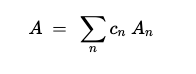
Where each  
A
n
  is some unitary, and some unitary  
U
  that prepares state |b⟩ from  |0⟩. Now, recall the general structure of a variational quantum algorithm. We have to construct a quantum cost function, which can be evaluated with a low-depth parameterized quantum circuit, then output to the classical optimizer. This allows us to search a parameter space for some set of parameters α, such that  
|
ψ
(
α
)
⟩
= 
|
x
⟩
/
|
|
x
|
|
 , where  
|
ψ
(
k
)
⟩
  is the output of out quantum circuit corresponding to some parameter set k.



The high level overview of the sub-routines within this algorithm is illustrated in the following image:
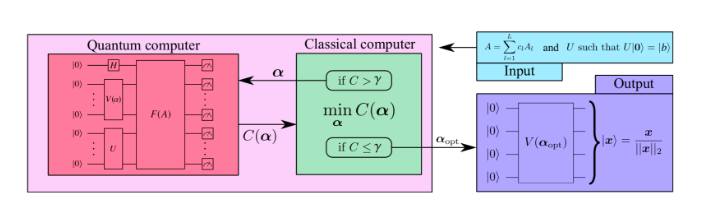

So essentially, we start off with a qubit register, with each qubit initialized to |0⟩. Our algorithm takes its inputs, then prepares and evaluates the cost function, starting with the creation of some ansatz V(α). If the computed cost is greater than some parameter γ, the algorithm is run again with updated parameters, and if not, the algorithm terminates, and the ansatz is calculated with the optimal parameters (determined at termination). This gives us the state vector that minimizes our cost function, and therefore the normalized form of  |x⟩.


# Methodology
We first define the problem and the general structure of a VQLS. As a second step, we consider a particular case and solve it explicitly with PennyLane

The problem:
We are given a 2n×2n matrix A which can be expressed as a linear combination of L unitary matrices A0, A1, ....... Al-1, 

i.e., A = L-1$∑_{0}$= $c_{l}$ $A_{l}$,
where $c_{l}$ are arbitrary complex numbers. Importantly, we assume that each of the unitary components $A_{l}$ can be efficiently implemented with a quantum circuit acting on n qubits.
We are also given a normalized complex vector in the physical form of a quantum state 
|b>, which can be generated by a unitary operation U applied to the ground state of n qubits. , i.e.,|b⟩=U|0⟩, where again we assume that U can be efficiently implemented with a quantum circuit. 

The problem that we aim to solve is that of preparing a quantum state 
|
x
⟩
, such that 
A
|
x
⟩
 is proportional to 
|
b
⟩
 or, equivalently, such that

|
Ψ
⟩
:=
A
|
x
⟩
/
√
⟨
x
|
$A{†}$
A
|
x
⟩
≈
|
b
⟩
.

# Variational Quantum Linear Solver

The approach used in a VQLS is to approximate the solution |x⟩ with a variational quantum circuit, i.e., a unitary circuit V depending on a finite number of classical real parameters w = (w0, w1,…):

|x⟩=V(w)|0⟩


The parameters should be optimized in order to maximize the overlap between the quantum states |Ψ⟩ and |b⟩. This suggests to define the following cost function:

CG =1−$|⟨b|Ψ⟩|^{2}$, such that its minimization with respect to the variational parameters should lead towards the problem solution.

# First Method

Let us write CG more explicitly:
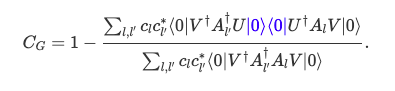

All expectation values of the previous expression could be estimated with a Hadamard test, which is a standard quantum computation technique. This method however might be experimentally challenging since it requires us to apply all the unitaries (U†,Al and V) in a controlled way, i.e., conditioned on the state of an ancillary qubit.

# Second Method

The second method, which is the one used in this tutorial, is to minimize a “local” version of the cost function which is easier to measure and, at the same time, leads to the same optimal solution. This local cost function, can be obtained by replacing the blue-colored projector 
|
0
⟩
⟨
0
|
 in the previous expression with the following positive operator:
 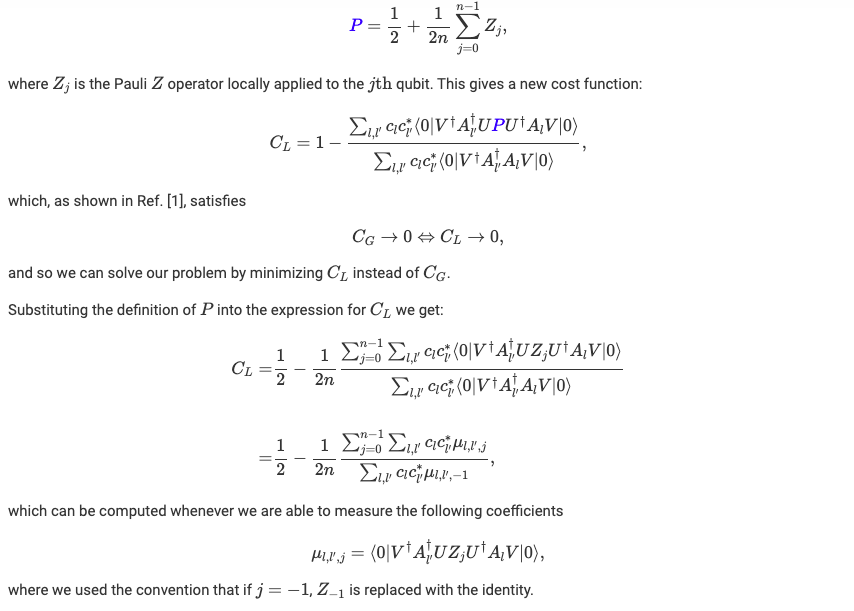



Also in this case the complex coefficients 
μ
l
,
l
′
,
j
 can be experimentally measured with a Hadamard test. The corresponding quantum circuit is shown in the image at the top of this tutorial. Compared with the previous method, the main advantage of this approach is that only the unitary operations 
$A_{l}$
,
$A†_{l}$
 and 
$Z_{j}$ need to be controlled by an external ancillary qubit, while V, $V{†}$, U and $U{†}$ can be directly applied to the system. This is particularly convenient whenever V has a complex structure, e.g., if it is composed of many variational layers.



# Implementation
In this notebook we solve a system of 3 qubits (plus an ancilla)
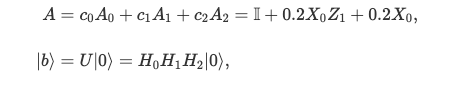
where $Z_{j}$, $X_{j}$, $H_{j}$ represent the Pauli Z, Pauli X and Hadamard gates applied to the qubit with index j.

This problem is computationally quite easy since a single layer of local rotations is enough to generate the solution state, i.e., we can use the following simple ansatz:
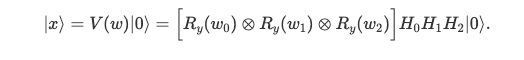
We solve this particular problem by minimizing the local cost function $C_{L}$. Eventually we will compare the quantum solution with the classical one.



In [ ]:
#General setup
# This Python code requires PennyLane and the plotting library matplotlib.
# Pennylane
import pennylane as qml
from pennylane import numpy as np

# Plotting
import matplotlib.pyplot as plt

In [8]:
# Setting of the main hyper-parameters of the model

n_qubits = 3  # Number of system qubits.
n_shots = 10 ** 6  # Number of quantum measurements.
tot_qubits = n_qubits + 1  # Addition of an ancillary qubit.
ancilla_idx = n_qubits  # Index of the ancillary qubit (last position).
steps = 30  # Number of optimization steps
eta = 0.8  # Learning rate
q_delta = 0.001  # Initial spread of random quantum weights
rng_seed = 0  # Seed for random number generator

Circuits of the quantum linear problem

We now define the unitary operations associated to the simple example presented in the introduction. Since we want to implement a Hadamard test, we need the unitary operations Aj to be controlled by the state of an ancillary qubit.

In [9]:
# Coefficients of the linear combination A = c_0 A_0 + c_1 A_1 ...
c = np.array([1.0, 0.2, 0.2])

def U_b():
    """Unitary matrix rotating the ground state to the problem vector |b> = U_b |0>."""
    for idx in range(n_qubits):
        qml.Hadamard(wires=idx)

def CA(idx):
    """Controlled versions of the unitary components A_l of the problem matrix A."""
    if idx == 0:
        # Identity operation
        None

    elif idx == 1:
        qml.CNOT(wires=[ancilla_idx, 0])
        qml.CZ(wires=[ancilla_idx, 1])

    elif idx == 2:
        qml.CNOT(wires=[ancilla_idx, 0])

In [10]:
# variational quantum circuit
# What follows is the variational quantum circuit that should generate the solution state |x⟩=V(w)|0⟩
# The first layer of the circuit is a product of Hadamard gates preparing a balanced superposition of all basis states.
# After that, we apply a very simple variational ansatz which is just a single layer of qubit rotations Ry(w0)⊗Ry(w1)⊗Ry(w2)

def variational_block(weights):
    """Variational circuit mapping the ground state |0> to the ansatz state |x>."""
    # We first prepare an equal superposition of all the states of the computational basis.
    for idx in range(n_qubits):
        qml.Hadamard(wires=idx)

    # A very minimal variational circuit.
    for idx, element in enumerate(weights):
        qml.RY(element, wires=idx)

In [11]:
# hadamard test
# We first initialize a PennyLane device with the default.qubit backend.
# As a second step, we define a PennyLane QNode representing a model of the actual quantum computation.

dev_mu = qml.device("default.qubit", wires=tot_qubits)

@qml.qnode(dev_mu)
def local_hadamard_test(weights, l=None, lp=None, j=None, part=None):

    # First Hadamard gate applied to the ancillary qubit.
    qml.Hadamard(wires=ancilla_idx)

    # For estimating the imaginary part of the coefficient "mu", we must add a "-i"
    # phase gate.
    if part == "Im" or part == "im":
        qml.PhaseShift(-np.pi / 2, wires=ancilla_idx)

    # Variational circuit generating a guess for the solution vector |x>
    variational_block(weights)

    # Controlled application of the unitary component A_l of the problem matrix A.
    CA(l)

    # Adjoint of the unitary U_b associated to the problem vector |b>.
    # In this specific example Adjoint(U_b) = U_b.
    U_b()

    # Controlled Z operator at position j. If j = -1, apply the identity.
    if j != -1:
        qml.CZ(wires=[ancilla_idx, j])

    # Unitary U_b associated to the problem vector |b>.
    U_b()

    # Controlled application of Adjoint(A_lp).
    # In this specific example Adjoint(A_lp) = A_lp.
    CA(lp)

    # Second Hadamard gate applied to the ancillary qubit.
    qml.Hadamard(wires=ancilla_idx)

    # Expectation value of Z for the ancillary qubit.
    return qml.expval(qml.PauliZ(wires=ancilla_idx))

In [12]:
# To get the real and imaginary parts of μl,l′,j, one needs to run the previous quantum circuit with and without a phase-shift of the ancillary qubit. 
# This is automatically done by the following function.

def mu(weights, l=None, lp=None, j=None):
    """Generates the coefficients to compute the "local" cost function C_L."""

    mu_real = local_hadamard_test(weights, l=l, lp=lp, j=j, part="Re")
    mu_imag = local_hadamard_test(weights, l=l, lp=lp, j=j, part="Im")

    return mu_real + 1.0j * mu_imag

In [13]:
# local cost functinon
# define a function for estimating ⟨x|A†A|x⟩.

def psi_norm(weights):
    """Returns the normalization constant <psi|psi>, where |psi> = A |x>."""
    norm = 0.0

    for l in range(0, len(c)):
        for lp in range(0, len(c)):
            norm = norm + c[l] * np.conj(c[lp]) * mu(weights, l, lp, -1)

    return abs(norm)

In [14]:
def cost_loc(weights):
    """Local version of the cost function. Tends to zero when A|x> is proportional to |b>."""
    mu_sum = 0.0

    for l in range(0, len(c)):
        for lp in range(0, len(c)):
            for j in range(0, n_qubits):
                mu_sum = mu_sum + c[l] * np.conj(c[lp]) * mu(weights, l, lp, j)

    mu_sum = abs(mu_sum)

    # Cost function C_L
    return 0.5 - 0.5 * mu_sum / (n_qubits * psi_norm(weights))

In [15]:
# variational optimization

#first initialize the variational weights with random parameters (with a fixed seed)
np.random.seed(rng_seed)
w = q_delta * np.random.randn(n_qubits, requires_grad=True)

In [16]:
# To minimize the cost function we use the gradient-descent optimizer.

opt = qml.GradientDescentOptimizer(eta)

In [17]:
# perform the optimization loop.

cost_history = []
for it in range(steps):
    w, cost = opt.step_and_cost(cost_loc, w)
    print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost))
    cost_history.append(cost)

Step   0       Cost_L = 0.0089888
Step   1       Cost_L = 0.0070072
Step   2       Cost_L = 0.0054157
Step   3       Cost_L = 0.0041528
Step   4       Cost_L = 0.0031617
Step   5       Cost_L = 0.0023917
Step   6       Cost_L = 0.0017988
Step   7       Cost_L = 0.0013461
Step   8       Cost_L = 0.0010028
Step   9       Cost_L = 0.0007442
Step  10       Cost_L = 0.0005503
Step  11       Cost_L = 0.0004058
Step  12       Cost_L = 0.0002984
Step  13       Cost_L = 0.0002190
Step  14       Cost_L = 0.0001604
Step  15       Cost_L = 0.0001173
Step  16       Cost_L = 0.0000857
Step  17       Cost_L = 0.0000625
Step  18       Cost_L = 0.0000455
Step  19       Cost_L = 0.0000331
Step  20       Cost_L = 0.0000241
Step  21       Cost_L = 0.0000175
Step  22       Cost_L = 0.0000127
Step  23       Cost_L = 0.0000092
Step  24       Cost_L = 0.0000067
Step  25       Cost_L = 0.0000049
Step  26       Cost_L = 0.0000035
Step  27       Cost_L = 0.0000026
Step  28       Cost_L = 0.0000019
Step  29      

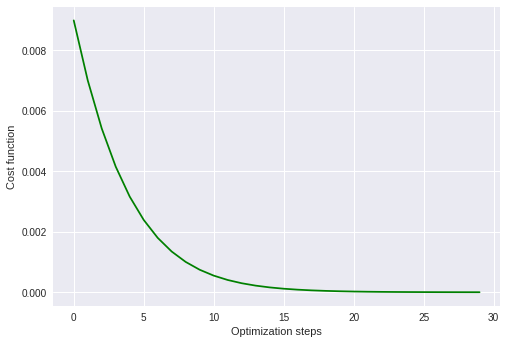

In [18]:
plt.style.use("seaborn")
plt.plot(cost_history, "g")
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.show()

Comparison of quantum and classical results

In [19]:
# Classical algorithm

# To solve the problem in a classical way, we use the explicit matrix representation in terms of numerical NumPy arrays.

Id = np.identity(2)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])

A_0 = np.identity(8)
A_1 = np.kron(np.kron(X, Z), Id)
A_2 = np.kron(np.kron(X, Id), Id)

A_num = c[0] * A_0 + c[1] * A_1 + c[2] * A_2
b = np.ones(8) / np.sqrt(8)

In [20]:
# We can print the explicit values of A and b :

print("A = \n", A_num)
print("b = \n", b)

A = 
 [[1.  0.  0.  0.  0.4 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.4 0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.4 0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.4 0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1. ]]
b = 
 [0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]


In [21]:
# The solution can be computed via a matrix inversion:

A_inv = np.linalg.inv(A_num)
x = np.dot(A_inv, b)

In [22]:
# Finally, in order to compare x with the quantum state |x⟩, we normalize and square its elements.

c_probs = (x / np.linalg.norm(x)) ** 2

In [24]:
# Preparation of the quantum solution
# Given the variational weights w that we have previously optimized, we can generate the quantum state |x⟩. 
# By measuring |x⟩ in the computational basis we can estimate the probability of each basis state.
# For this task, we initialize a new PennyLane device and define the associated qnode circuit.


dev_x = qml.device("default.qubit", wires=n_qubits, shots=n_shots)

@qml.qnode(dev_x)
def prepare_and_sample(weights):

    # Variational circuit generating a guess for the solution vector |x>
    variational_block(weights)

    # We assume that the system is measured in the computational basis.
    # then sampling the device will give us a value of 0 or 1 for each qubit (n_qubits)
    # this will be repeated for the total number of shots provided (n_shots)
    return qml.sample()

In [25]:
# To estimate the probability distribution over the basis states we first take n_shots samples and then compute the relative frequency of each outcome.

raw_samples = prepare_and_sample(w)

# convert the raw samples (bit strings) into integers and count them
samples = []
for sam in raw_samples:
    samples.append(int("".join(str(bs) for bs in sam), base=2))

q_probs = np.bincount(samples) / n_shots

In [26]:
# comparison
# classical output

print("x_n^2 =\n", c_probs)

x_n^2 =
 [0.08445946 0.08445946 0.16554054 0.16554054 0.08445946 0.08445946
 0.16554054 0.16554054]


In [27]:
print("|<x|n>|^2=\n", q_probs)

|<x|n>|^2=
 [0.084589 0.085022 0.164642 0.164879 0.085241 0.084731 0.165431 0.165465]


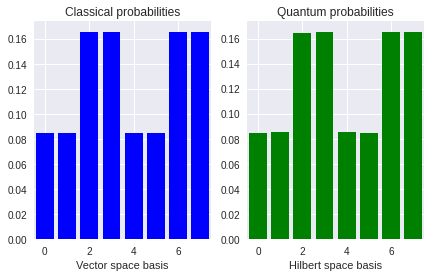

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

ax1.bar(np.arange(0, 2 ** n_qubits), c_probs, color="blue")
ax1.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")

ax2.bar(np.arange(0, 2 ** n_qubits), q_probs, color="green")
ax2.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities")

plt.show()